## Embeddings in Deep Learning
---

*What are Embeddings?*

In deep learning, **embeddings** are dense vector representations of data. They are essentially learned numerical representations of input data (e.g., images, words, sentences) in a continuous vector space. Embeddings are particularly powerful because they encode **meaningful features** that capture the intrinsic relationships within the data.

For Convolutional Neural Networks (CNNs), embeddings are typically found in the final layer (or penultimate layer, the last layer *before* the output layer) of the network before classification. 

At this stage, the CNN has distilled the input image into a highly compressed form—a vector containing high-level abstract features learned during training.

---

*Why are Embeddings important?*

Embeddings are essential in deep learning because they:

1. **Capture High-Level Features:** The embeddings represent a distilled version of the most relevant information in the input (e.g., visual features in images).
2. **Enable Comparisons:** The embeddings of similar inputs are close in vector space, enabling us to compute similarity or clustering.
3. **Transfer Knowledge:** Pre-trained CNN embeddings can generalize well to new tasks without requiring re-training, saving computational resources.
4. **Reduce Dimensionality:** Raw input data (e.g., pixels of an image) is typically very high-dimensional. Embeddings reduce this to a compact vector representation while retaining meaningful features.

---


*How CNNs work (a brief recap)*

CNNs process images through a series of **convolutions, pooling, and nonlinear activations** to extract increasingly abstract features:

- **Early layers** focus on low-level features like edges, textures, or colors.
- **Deeper layers** learn higher-level features, such as shapes, objects, or patterns.
- **Output layer** delivers a task tailerd output, e.g., class scores (for classification) or a continous number (for regression).

---

*Where Embeddings fit in CNNs*

Usually, the **last hidden layer** (the output layer) is where embeddings are most commonly extracted from. This layer represents the high-level features learned by the CNN in a compact vector. For example:

- In a CNN trained on ImageNet, the last layer might output a **1000-dimensional vector** for classification across 1000 categories.
- By removing the classification layer, the model's last hidden layer instead outputs a **feature vector (embedding)** for any input image, which can be used for tasks like similarity search, clustering, and transfer learning.

---

## Key Applications of CNN Embeddings

**1. Image Similarity Search**

CNN embeddings allow us to compare images by computing the **distance** (e.g., cosine similarity or Euclidean distance) between their feature vectors. For instance:

- Images of dogs will have embeddings that are closer together in vector space than embeddings of dogs and cats.
- This makes embeddings ideal for **content-based image retrieval (CBIR)** systems.

**2. Transfer Learning**

CNN embeddings allow us to transfer knowledge from a pre-trained model to a new task. Instead of training a new model from scratch:

- Use a pre-trained CNN to process all the images in your dataset in order to generate rich embeddings for each one of them. 
- Use these embeddings as input features to our new model.
- Train a lightweight classifier or regressor on these features for your task.


**3. Clustering and Dimensionality Reduction**

Embedding spaces make it easier to cluster images into groups or visualize them using techniques like **t-SNE** or **UMAP**.


**4. Anomaly Detection**

If the embeddings of a CNN are clustered around typical examples in your dataset, any input image that generates an **outlier embedding** (far from the cluster) can be flagged as anomalous.

---

##  How do Embeddings work?

Some key properties of Embeddings are as follows

1. **Proximity Represents Similarity:** Similar inputs produce embeddings that are close in vector space.
2. **Disentangled Features:** Embeddings separate distinct features (e.g., color, texture, shape) into independent dimensions.
3. **Generalization:** Pre-trained embeddings generalize well across domains.

---

## Code Example - Extracting and using Image Embeddings

We’ll use PyTorch to load a pre-trained ResNet-50 model and remove its final classification layer. We'll then use the model to generate embeddings for the images we feed into it.

In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Load Pre-trained ResNet-50
resnet_model = models.resnet50(pretrained=True)

# Inspect the model architecture
resnet_model

/home/goose/projects/deeplearning/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/goose/projects/deeplearning/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [2]:
list(resnet_model.children())[:-1]

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (downsample): Sequential(
       (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (1): BatchNorm2d(256, eps=1e-05, momentum

In [3]:
# Remove the classification head

resnet_model = nn.Sequential(*list(resnet_model.children())[:-1])


In [4]:
# Inspect the model
# Note that this will now output a 2048-dimensional vector, for each input image

resnet_model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [5]:
# Define a tranformation to preprocess the input image, to the expected 224x224 input size of the ResNet-50 model

transform = transforms.Compose([
                                transforms.Resize((224, 224)),  # Resize to 224x224 (ResNet input size)
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize as ResNet expects
                               ])


# Define a function to get the embedding for an image

def get_embedding(image_path, model):
    
    model.eval()
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Generate embedding
    with torch.no_grad():
        embedding = model(image).squeeze()  # Remove batch and spatial dimensions

    result = embedding.numpy().reshape(1, -1) # Convert to numpy array and reshape to (1, output_dim_size)
 
    return result

---

## Excercises

### Problem 1.

**a)**

Begin by downloading (from arbitrary source) images of cats, dogs and birds. Make sure to have 3 different images of each animal.

Then, generate and extract embeddings for all 9 images. 

Once that's done, start calculating the cosine similarity (imported from sklearn, above) between each pair of embeddings for your animal pictures. Does the results make sense?


*Also, do you recall cosine similarity from Linear Algebra course? :)*

If not, here's the official documentation https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

What does the cosine_similarity measure, do you think?



In [6]:
import glob
import seaborn as sns

# helper functions
def calculate_cosine_similarities(embeddings):
    n = len(embeddings)
    similarities = np.zeros((n, n))
    for i, (img1, emb1) in enumerate(embeddings.items()):
        for j, (img2, emb2) in enumerate(embeddings.items()):
            sim = cosine_similarity(emb1, emb2)[0][0]
            similarities[i, j] = sim
    return similarities

def calculate_euclidean_distances(embeddings):
    n = len(embeddings)
    distances = np.zeros((n, n))
    for i, (img1, emb1) in enumerate(embeddings.items()):
        for j, (img2, emb2) in enumerate(embeddings.items()):
            dist = euclidean_distances(emb1, emb2)[0][0]
            distances[i, j] = dist
    return distances

def plot_heatmap(matrix, title, labels):
    plt.figure(figsize=(10, 8))
    sorted_labels = sorted(labels)
    sns.heatmap(matrix, 
                xticklabels=sorted_labels,
                yticklabels=sorted_labels,
                annot=True, fmt='.2f')
    plt.title(title)
    plt.show()


# get embeddings for all images
image_paths = glob.glob('data/*.jpg')
resnet_embeddings = {path.split('/')[-1]: get_embedding(path, resnet_model) for path in image_paths}

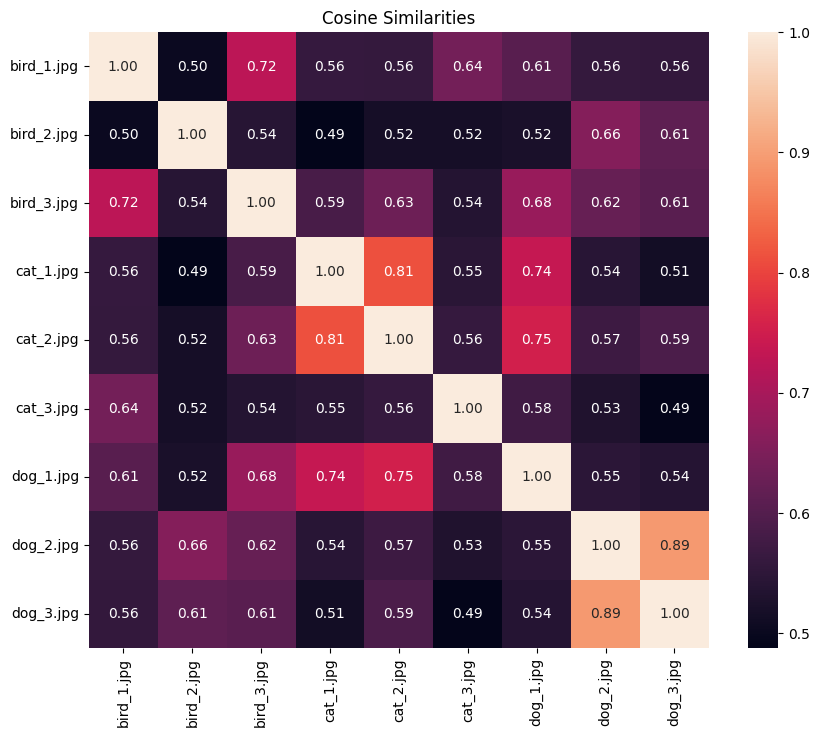

In [7]:
resnet_cosine_similarities = calculate_cosine_similarities(resnet_embeddings)
plot_heatmap(resnet_cosine_similarities, 'Cosine Similarities', list(resnet_embeddings.keys()))

In [8]:
# if working in 2D or 3D, we can convert cosine similarity to degrees

def cos_to_degrees(cos_sim):
    return np.arccos(cos_sim) * (180/np.pi)

# example usage:
angle = cos_to_degrees(0.81)
print(f"Cosine similarity of 0.81 corresponds to an angle of {angle:.2f} degrees.")

Cosine similarity of 0.81 corresponds to an angle of 35.90 degrees.


**b)**

Repeat the above excercise but now instead of cosine similarity, calculate the *euclidean distance* between the all the image embeddings pairs. Does the result make sense?

*Note: what does the euclidean distance (pythagoran distance) between two vectors mean?*


**Answer:**

Euclidean distance measures the straight-line distance between two points in n-dimensional space, calculated using the Pythagorean formula: sqrt(sum((a-b)²)). For embeddings, it quantifies how different two images are in feature space - larger distances indicate more dissimilar images.

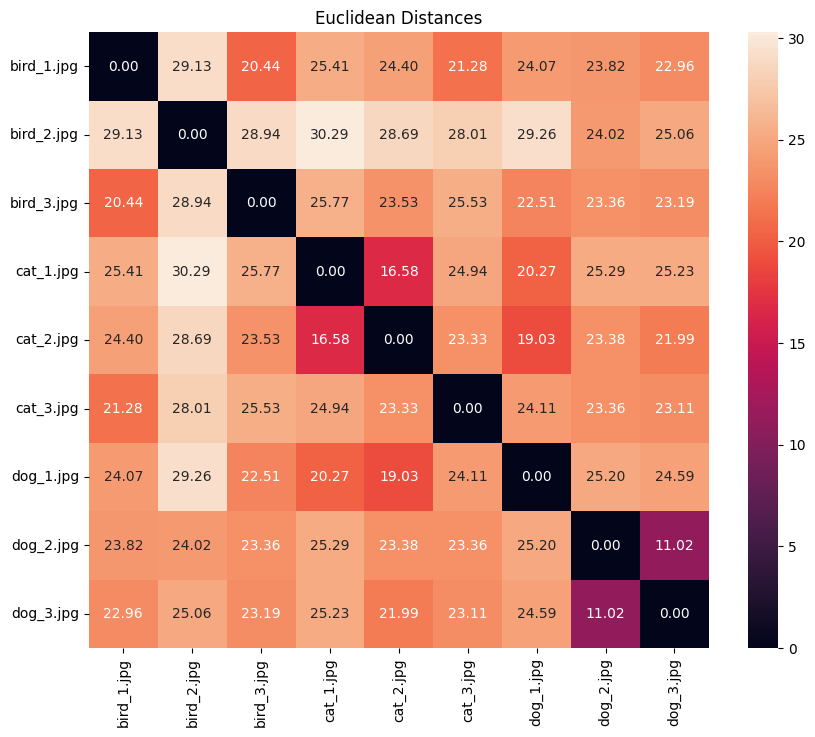

In [9]:
resnet_distance_matrix = calculate_euclidean_distances(resnet_embeddings)
plot_heatmap(resnet_distance_matrix, 'Euclidean Distances', list(resnet_embeddings.keys()))

**c)**

Can we draw any conclusions from the above results? What does it mean for the embeddings of two images to be close or far apart? Are the results "perfect"?

**Answer:**

The results show that the embeddings of similar images are closer together in vector space, while dissimilar images are further apart. This confirms that the embeddings capture meaningful features that distinguish between different types of animals.

However, the results are not perfect due to various factors such as image quality, lighting, and background.



In [10]:
# see answer in markdown above

**d)**

Now try another pre-trained model and repeat the above. Do you get similar, better or worse results? What conclusions can you draw?

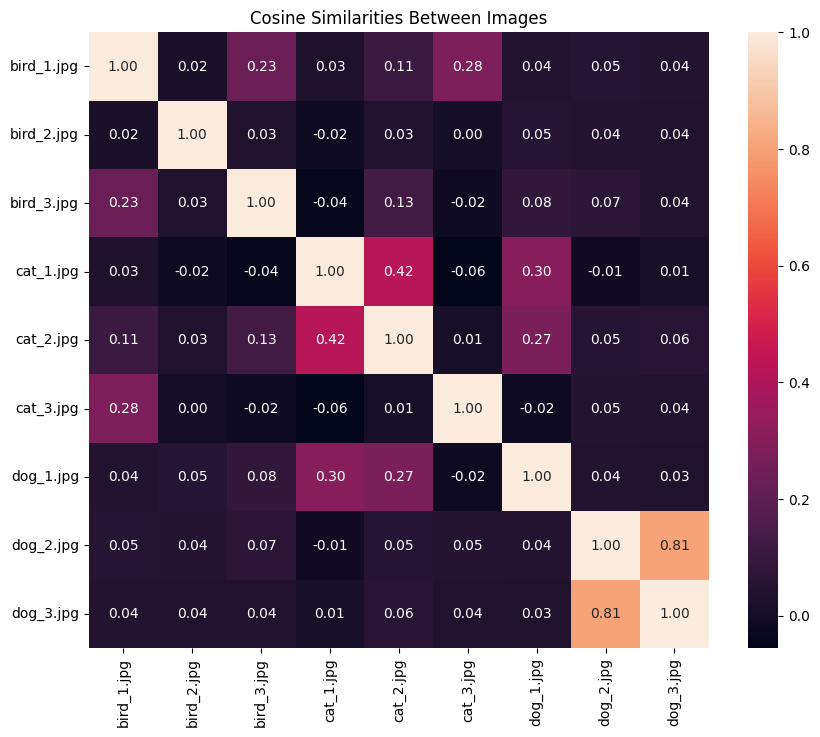

In [11]:
# efficientnet

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# load and prepare models
efficientnet_model = models.efficientnet_b6(pretrained=True)
efficientnet_model = nn.Sequential(*list(efficientnet_model.children())[:-1]) 

# get embeddings for all images
image_paths = glob.glob('data/*.jpg')
efficientnet_embeddings = {path.split('/')[-1]: get_embedding(path, efficientnet_model) for path in image_paths}

efficientnet_cosine_similarities = calculate_cosine_similarities(efficientnet_embeddings)
plot_heatmap(efficientnet_cosine_similarities, 'Cosine Similarities Between Images', list(efficientnet_embeddings.keys()))

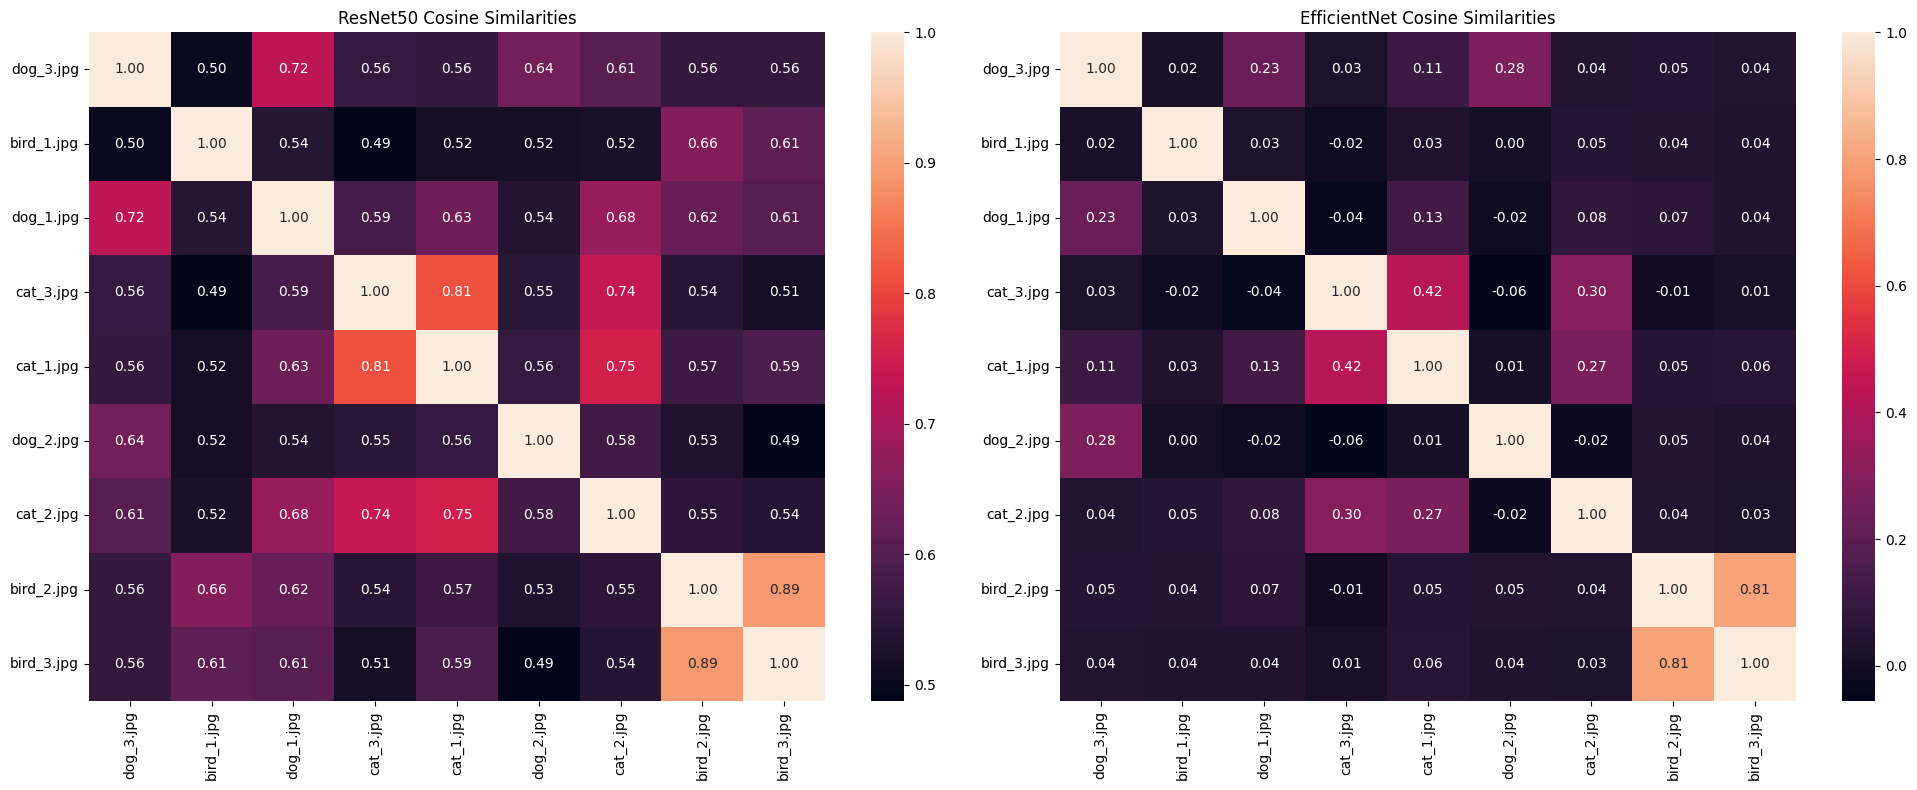

In [12]:
# create subplot with 2 heatmaps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# plot resnet heatmap
sns.heatmap(resnet_cosine_similarities, 
            xticklabels=list(resnet_embeddings.keys()),
            yticklabels=list(resnet_embeddings.keys()),
            annot=True, fmt='.2f', ax=ax1)
ax1.set_title('ResNet50 Cosine Similarities')

# plot efficientnet heatmap
sns.heatmap(efficientnet_cosine_similarities, 
            xticklabels=list(efficientnet_embeddings.keys()),
            yticklabels=list(efficientnet_embeddings.keys()),
            annot=True, fmt='.2f', ax=ax2)
ax2.set_title('EfficientNet Cosine Similarities')

plt.tight_layout()
plt.show()

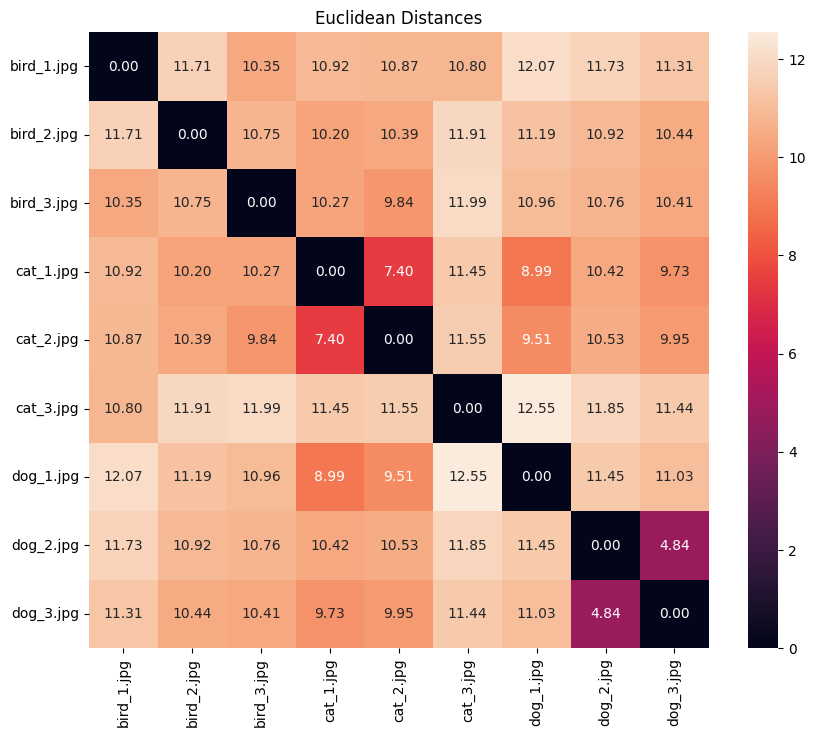

In [13]:
efficientnet_distance_matrix = calculate_euclidean_distances(efficientnet_embeddings)
plot_heatmap(efficientnet_distance_matrix, 'Euclidean Distances', list(efficientnet_embeddings.keys()))

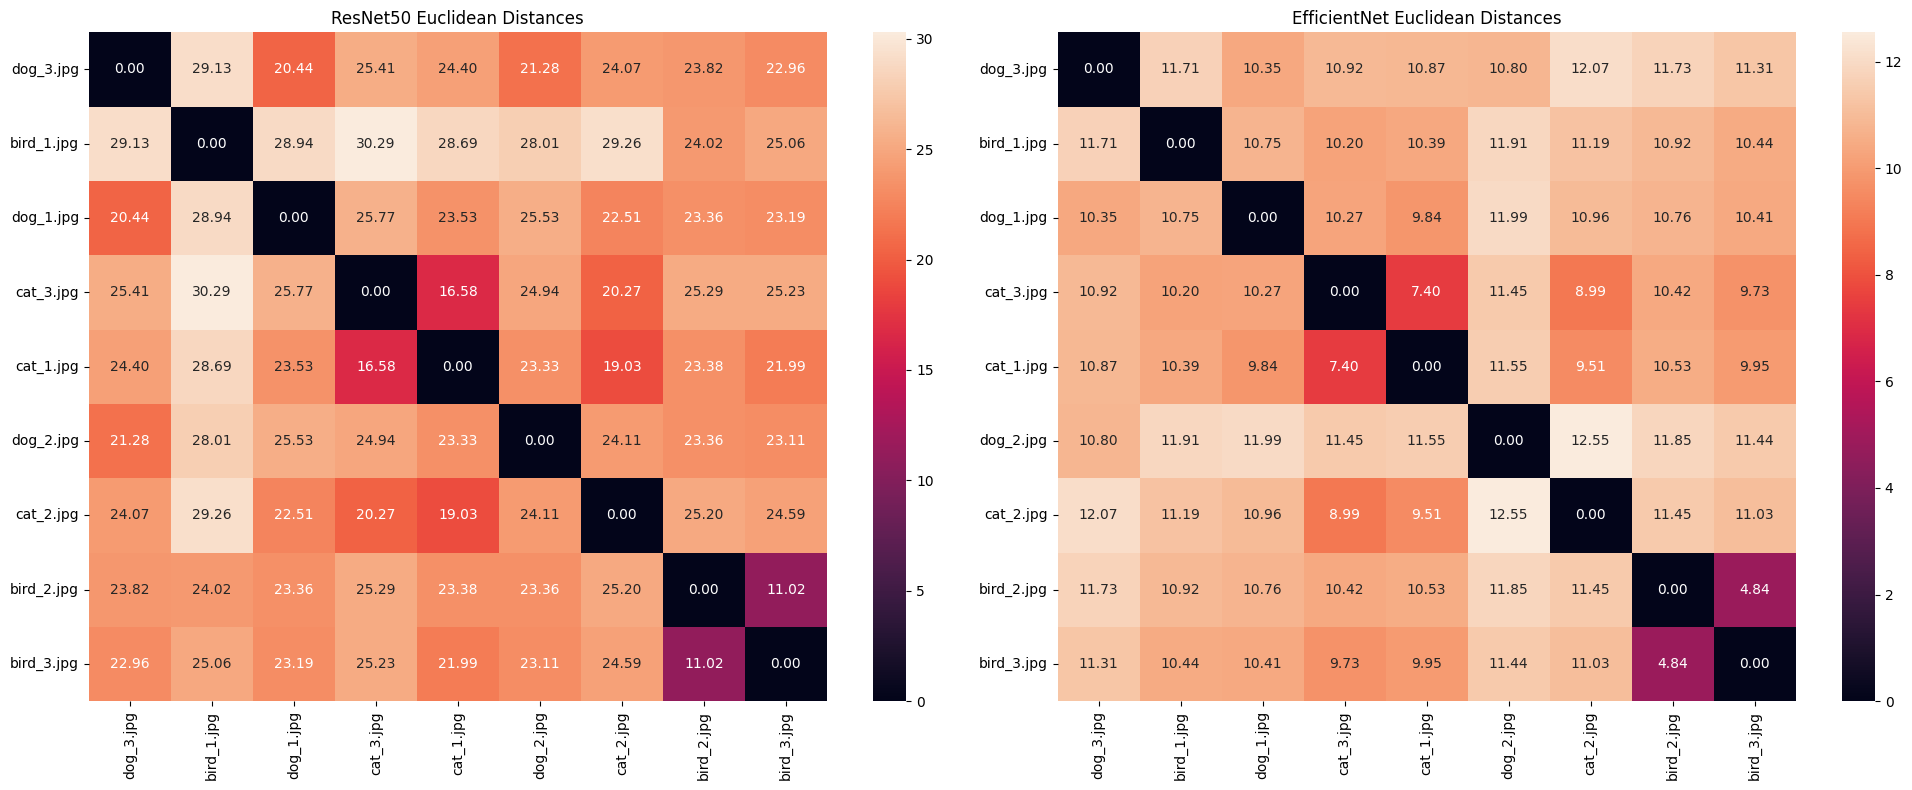

In [14]:
# create subplot with 2 heatmaps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# plot resnet heatmap
sns.heatmap(resnet_distance_matrix, 
            xticklabels=list(resnet_embeddings.keys()),
            yticklabels=list(resnet_embeddings.keys()),
            annot=True, fmt='.2f', ax=ax1)
ax1.set_title('ResNet50 Euclidean Distances')

# plot efficientnet heatmap
sns.heatmap(efficientnet_distance_matrix, 
            xticklabels=list(efficientnet_embeddings.keys()),
            yticklabels=list(efficientnet_embeddings.keys()),
            annot=True, fmt='.2f', ax=ax2)
ax2.set_title('EfficientNet Euclidean Distances')

plt.tight_layout()
plt.show()

### Problem 2

Use-cases everywhere!

Look at the list of example use-cases above. Can you think of concrete examples of each? Write down specific applications for each use-case, and discuss with your classmates.

### Problem 3

Tiiituuut - Vem där?! :)

Let's apply what we've learned so far to try building a *face recognition* app. 

**a)**

Start by collecting a bunch of pictures of yourself, and then some of your friends and/or random people you find on the internet. 

Then, repeat the excercise from Problem 1, but now with these images instead. Can you accurately pinpoint yourself in images?


.



In [18]:
# get embeddings for all images
image_paths = glob.glob('data/profile/*.jpg')
resnet_embeddings = {path.split('/')[-1]: get_embedding(path, resnet_model) for path in image_paths}
efficientnet_embeddings = {path.split('/')[-1]: get_embedding(path, efficientnet_model) for path in image_paths}

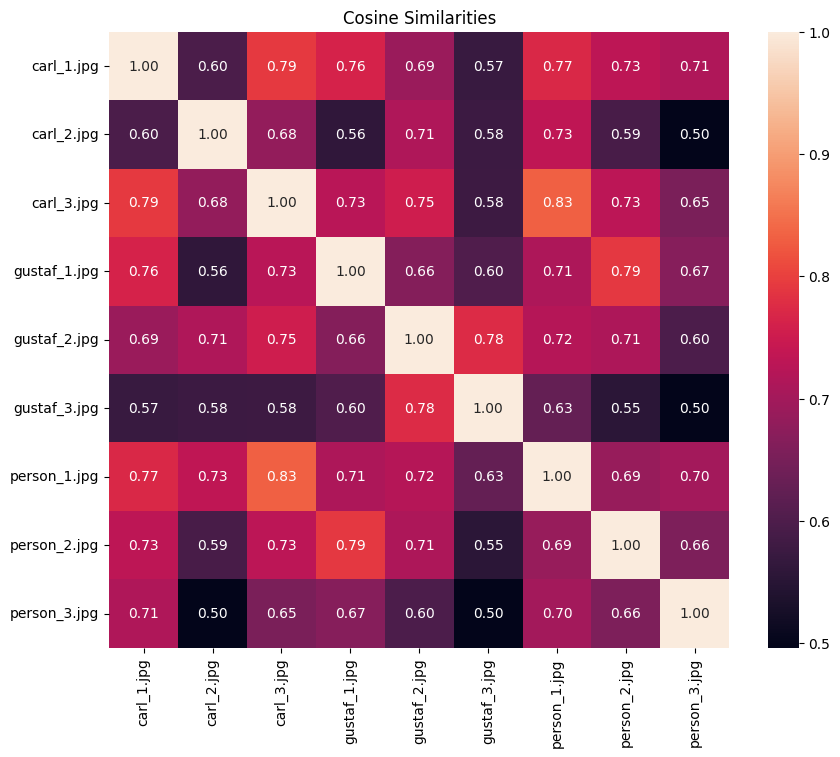

In [21]:
resnet_cosine_similarities = calculate_cosine_similarities(resnet_embeddings)
plot_heatmap(resnet_cosine_similarities, 'Cosine Similarities', list(resnet_embeddings.keys()))

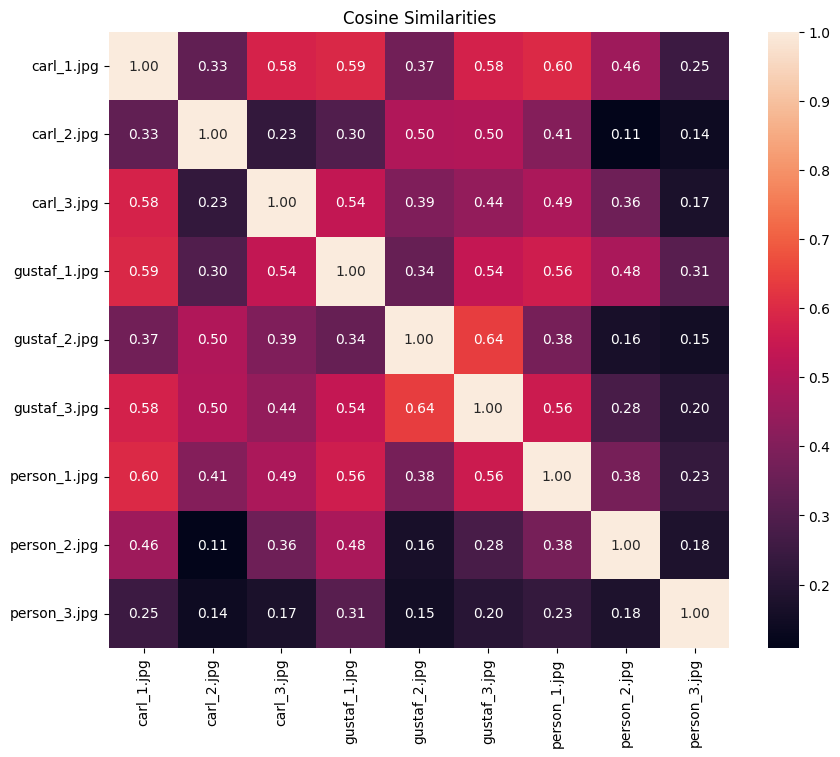

In [19]:
efficientnet_cosine_similarities = calculate_cosine_similarities(efficientnet_embeddings)
plot_heatmap(efficientnet_cosine_similarities, 'Cosine Similarities', list(efficientnet_embeddings.keys()))

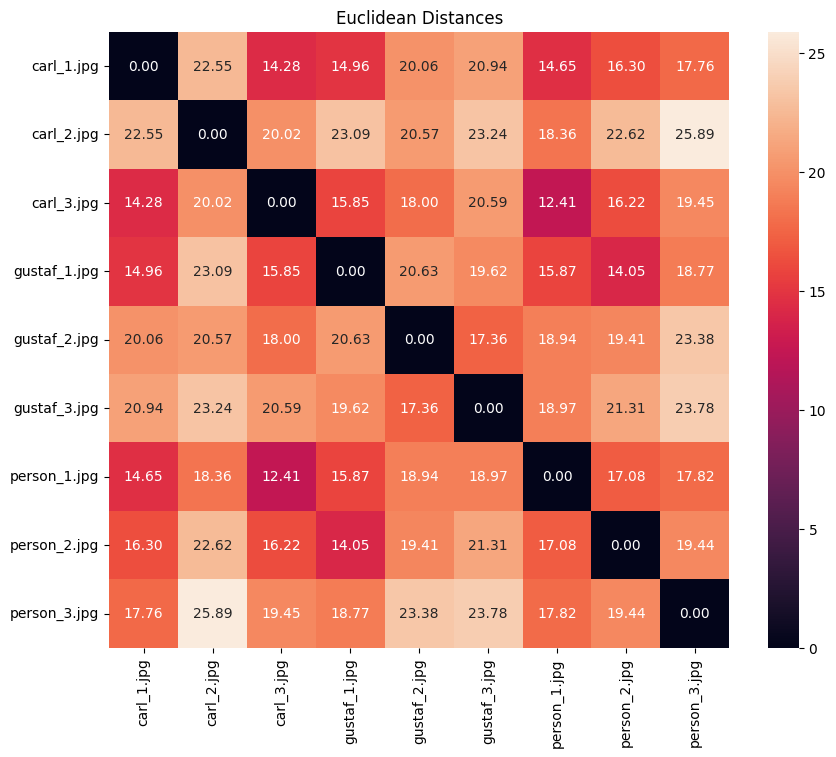

In [17]:
resnet_distance_matrix = calculate_euclidean_distances(resnet_embeddings)
plot_heatmap(resnet_distance_matrix, 'Euclidean Distances', list(resnet_embeddings.keys()))

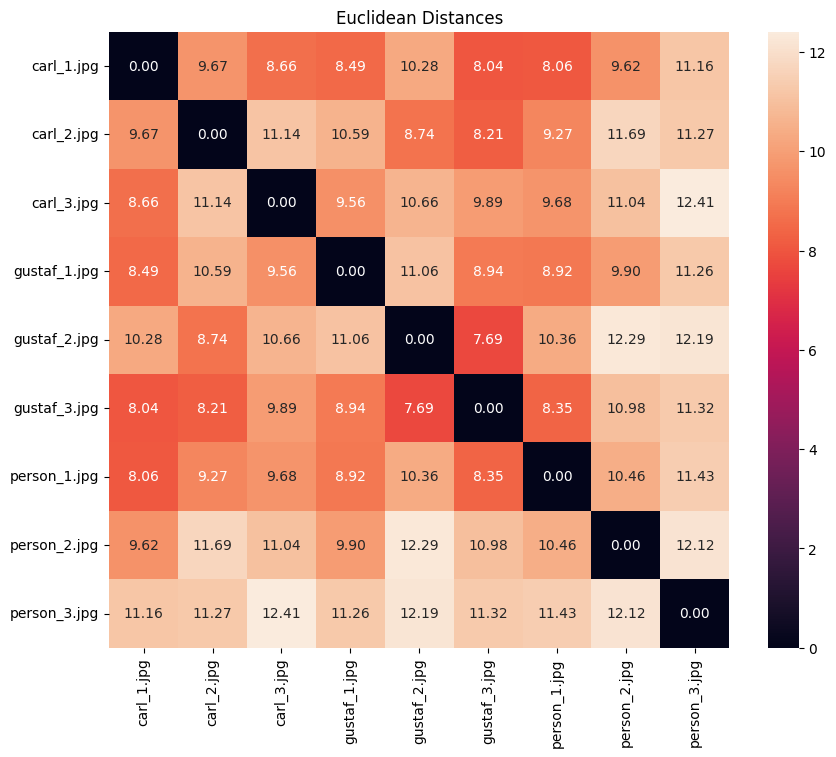

In [22]:
efficientnet_distance_matrix = calculate_euclidean_distances(efficientnet_embeddings)
plot_heatmap(efficientnet_distance_matrix, 'Euclidean Distances', list(efficientnet_embeddings.keys()))

**b)**

Ok, let's get serious with a challange here. Assume now that we want to create an app that connect to your webcam (if you have one) and analyze pictures taken from it. If you don't have a webcam, team up with a friend that does.

This problem can be split into a few steps:

1. Connect to your webcam via Python. Search online on how to do it.
2. Take pictures in regular intervals (e.g. every 5 seconds, or perhaps less).
3. Generate embeddings of these images the moment they are taken, and compare them with the embeddings of the images you've collected in **a)**. If the embeddings are close, you've hopefully found a match!
4. Display the result on the screen somehow. 

If done correctly, this will work as "real-time" face recognition app!

*Note: How will you compare the embeddings of the images taken from the camera, with the existing images of yourself? What criteria do you set for a match? Discuss with your classmates.*